# Linear and logistic regression

As ever, let's first load the data:

In [1]:
import pandas as pd
import numpy as np
import sklearn.datasets as ds
import matplotlib.pyplot as plt

# Regression data
dataset_reg = ds.load_boston()
X_reg = pd.DataFrame(data = dataset_reg['data'], columns = dataset_reg['feature_names'])
y_reg = pd.DataFrame(data = dataset_reg['target'], columns = ['target'])
print(X_reg.head())
print(y_reg.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
   target
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2


In [2]:
# Classification data
dataset_class = ds.load_breast_cancer()
X_class = pd.DataFrame(data = dataset_class['data'], columns = dataset_class['feature_names'])
y_class = pd.DataFrame(data = dataset_class['target'], columns = ['target'])
print(X_class.head())
print(y_class.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

## Linear regression

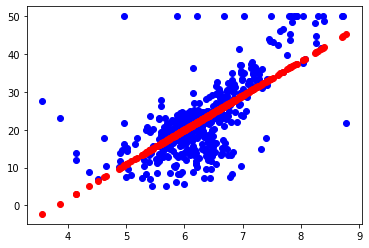

In [3]:
from sklearn.linear_model import LinearRegression

# We single out 1 independent variable
x_val = X_reg[['RM']]

# Creation of the LinearRegression object
lin_r = LinearRegression()

# Fitting the data
lin_r.fit(x_val, y_reg)

# Obtaining predictions
prediction = lin_r.predict(x_val)

# Plotting the predicted and actual values
plt.scatter(x_val, y_reg, color = 'blue')
plt.scatter(x_val, prediction, color = 'red')
plt.show()

In [4]:
# beta_1 / the slope
print(lin_r.coef_)

# beta_0 / the intercept
print(lin_r.intercept_)

[[9.10210898]]
[-34.67062078]


## Logistic regression

In [17]:
from sklearn. linear_model import LogisticRegression

# Again, we select a particular independent variable for our analysis
x_val = X_class[['mean perimeter']]

# Creating the LogisticRegression object
log_r = LogisticRegression(solver='liblinear')

# Fitting the data
log_r.fit(x_val, y_class.values.reshape(-1,))

# And... prediction
prediction = log_r.predict(x_val)

In [22]:
correct = 0
for pred, actual in zip(prediction, y_class.values):
    if pred == actual:
        correct += 1
        
print('#Correct: ', correct, ' out of ', len(prediction))

#Correct:  505  out of  569
